In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Основые функции, описывающие населения

In [8]:
from users import UserDistribution
from transport_types import TrainTransport, TaxiTransport, CarTransport

N = 100000
dis = UserDistribution(N, 1.1,  100000)

trans = [
    TrainTransport(2200, 12000, 0, 1000000),
    TaxiTransport(1000, 15000, 0, 0.5, 1000),
    CarTransport(3000, 15000, 1000, 0)
]

x0 = [N / 4, N / 4,  N / 2]
x_story = [x0]

In [9]:
for step in range(40):
    x = [0, 0, 0]
    for price, n in dis.distrib(1):
        f0 = trans[0].cost(price, x0[0], x0[0])
        f1 = trans[1].cost(price, x0[1], x0[1] + x0[2])
        f2 = trans[2].cost(price, x0[2], x0[2] + x0[1])
#         print([f0, f1, f2])
        if f0 < f1 and f0 < f2:
            x[0] += n
        elif f1 < f0 and f1 < f2:
            x[1] += n
        else:
            x[2] += n
    x_story.append(x)
    if step > 3:
        x0 = np.average(np.array(x_story[-3:]), axis=0)
    else:
        x0 = np.average(np.array(x_story), axis=0)
#     x0 = x

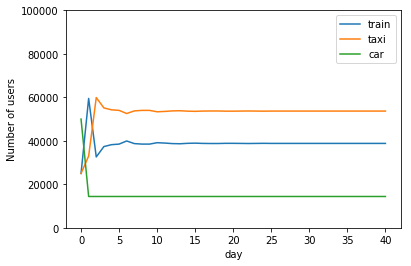

In [10]:
x_story_np = np.array(x_story)

plt.plot(x_story_np[:, 0], label='train')
plt.plot(x_story_np[:, 1], label='taxi')
plt.plot(x_story_np[:, 2], label='car')
plt.ylim(0, N)
plt.ylabel("Number of users")
plt.xlabel("day")
plt.legend()